In [2]:
# importing packages

import pandas as pd
import numpy as no

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage , dendrogram, cut_tree

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
## Drop Type column
df.drop('Type', axis = 1, inplace = True)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [6]:
df['ID'] = 100+df.index
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,100
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,101
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,102
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,103
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,104


In [7]:
df.shape

(214, 10)

In [8]:
df.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
ID    0
dtype: int64

In [9]:
## Outlier Treatment
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'ID'], dtype='object')

In [10]:
list(enumerate(col))
for i in enumerate(col):
    print(i)

NameError: name 'col' is not defined

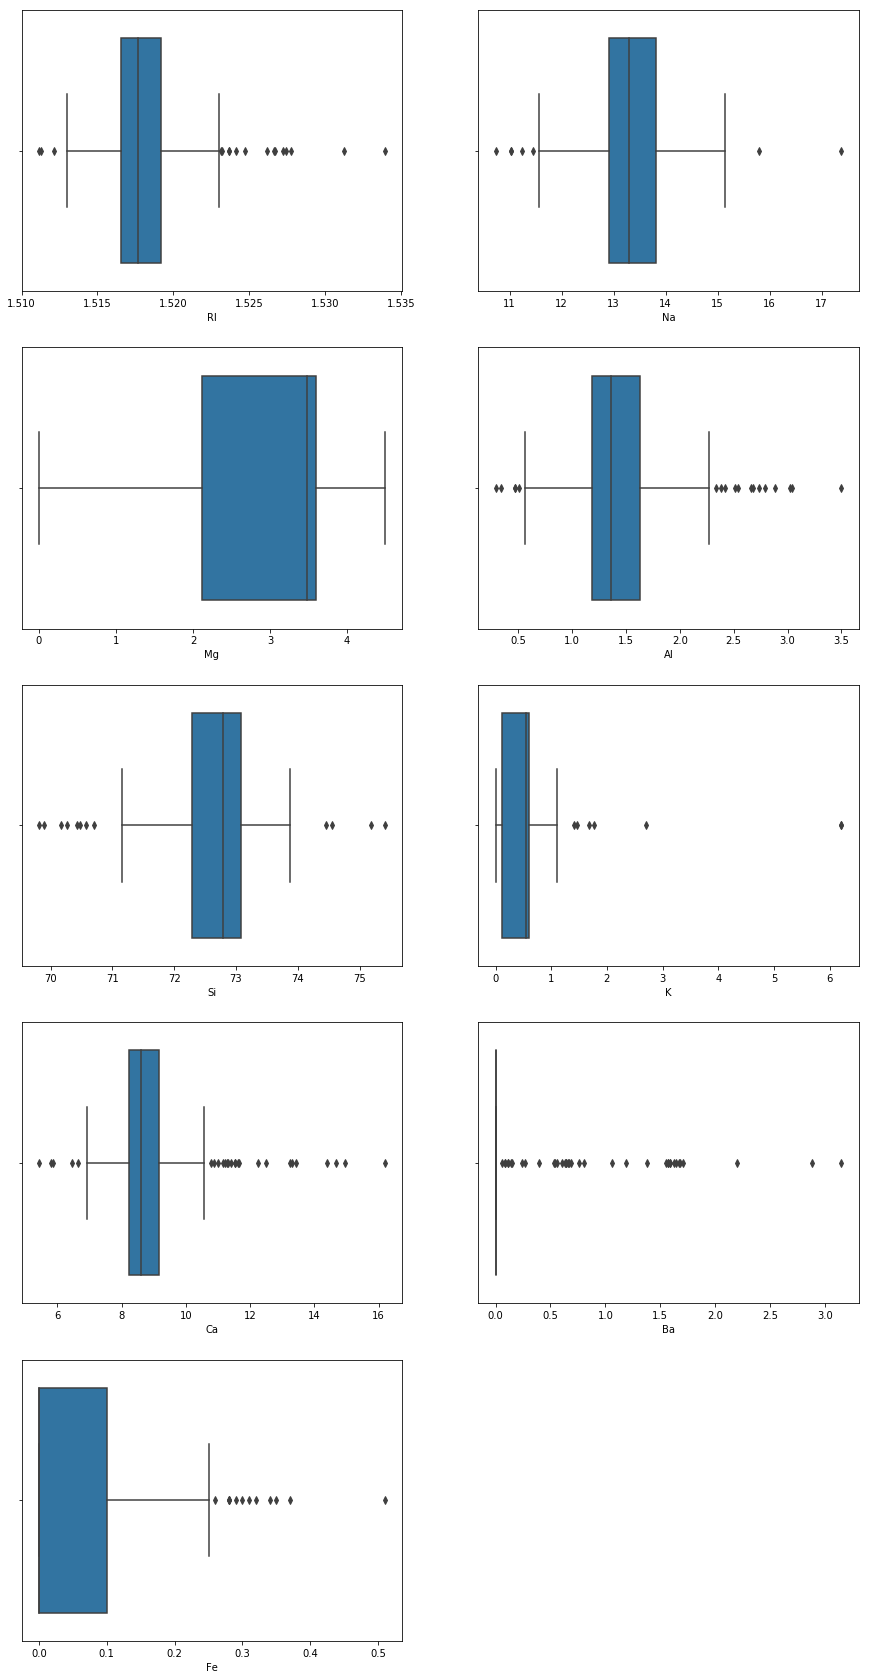

In [11]:
plt.figure(figsize = (15,30))
col = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
for i in enumerate(col):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x = i[1], data = df)

In [12]:
for i in col:
    q1 = df[i].quantile(0.01)
    q4 = df[i].quantile(0.99)
    df = df[(df[i]>=q1) & (df[i]<=q4)]

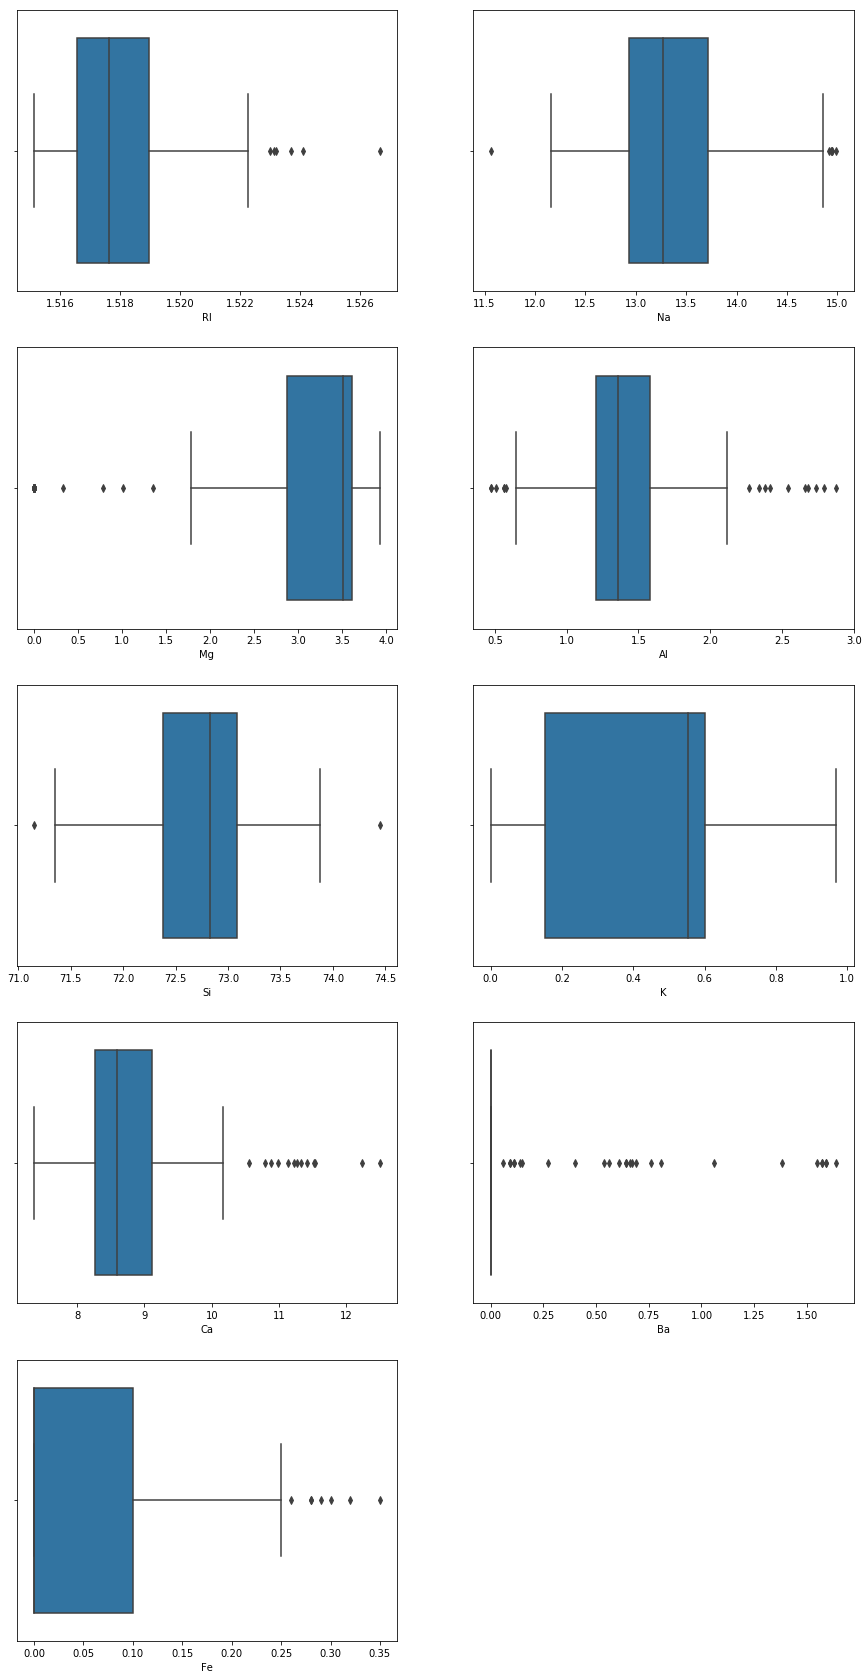

In [13]:
plt.figure(figsize = (15,30))
col = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
for i in enumerate(col):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x = i[1], data = df)

In [14]:
df.shape

(182, 10)

In [15]:
## Scale
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,101
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,102
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,103
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,104
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,105


In [16]:
dat1 = df.drop('ID', axis=1)
dat1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dat2  =scaler.fit_transform(dat1)

In [18]:
dat2 = pd.DataFrame(dat2)
dat2.columns = dat1.columns
dat2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.243959,0.804726,0.545525,-0.132385,-0.003568,0.221254,-1.142618,-0.325587,-0.627780
1,-0.940227,0.230498,0.506928,0.291972,0.478827,-0.143347,-1.198341,-0.325587,-0.627780
2,-0.219614,-0.279928,0.614998,-0.297412,-0.226212,0.585855,-0.707983,-0.325587,-0.627780
3,-0.336470,-0.184223,0.560963,-0.415289,0.645810,0.504832,-0.875150,-0.325587,-0.627780
4,-1.047345,-0.949861,0.553244,0.480575,0.441720,0.869433,-0.875150,-0.325587,2.328094


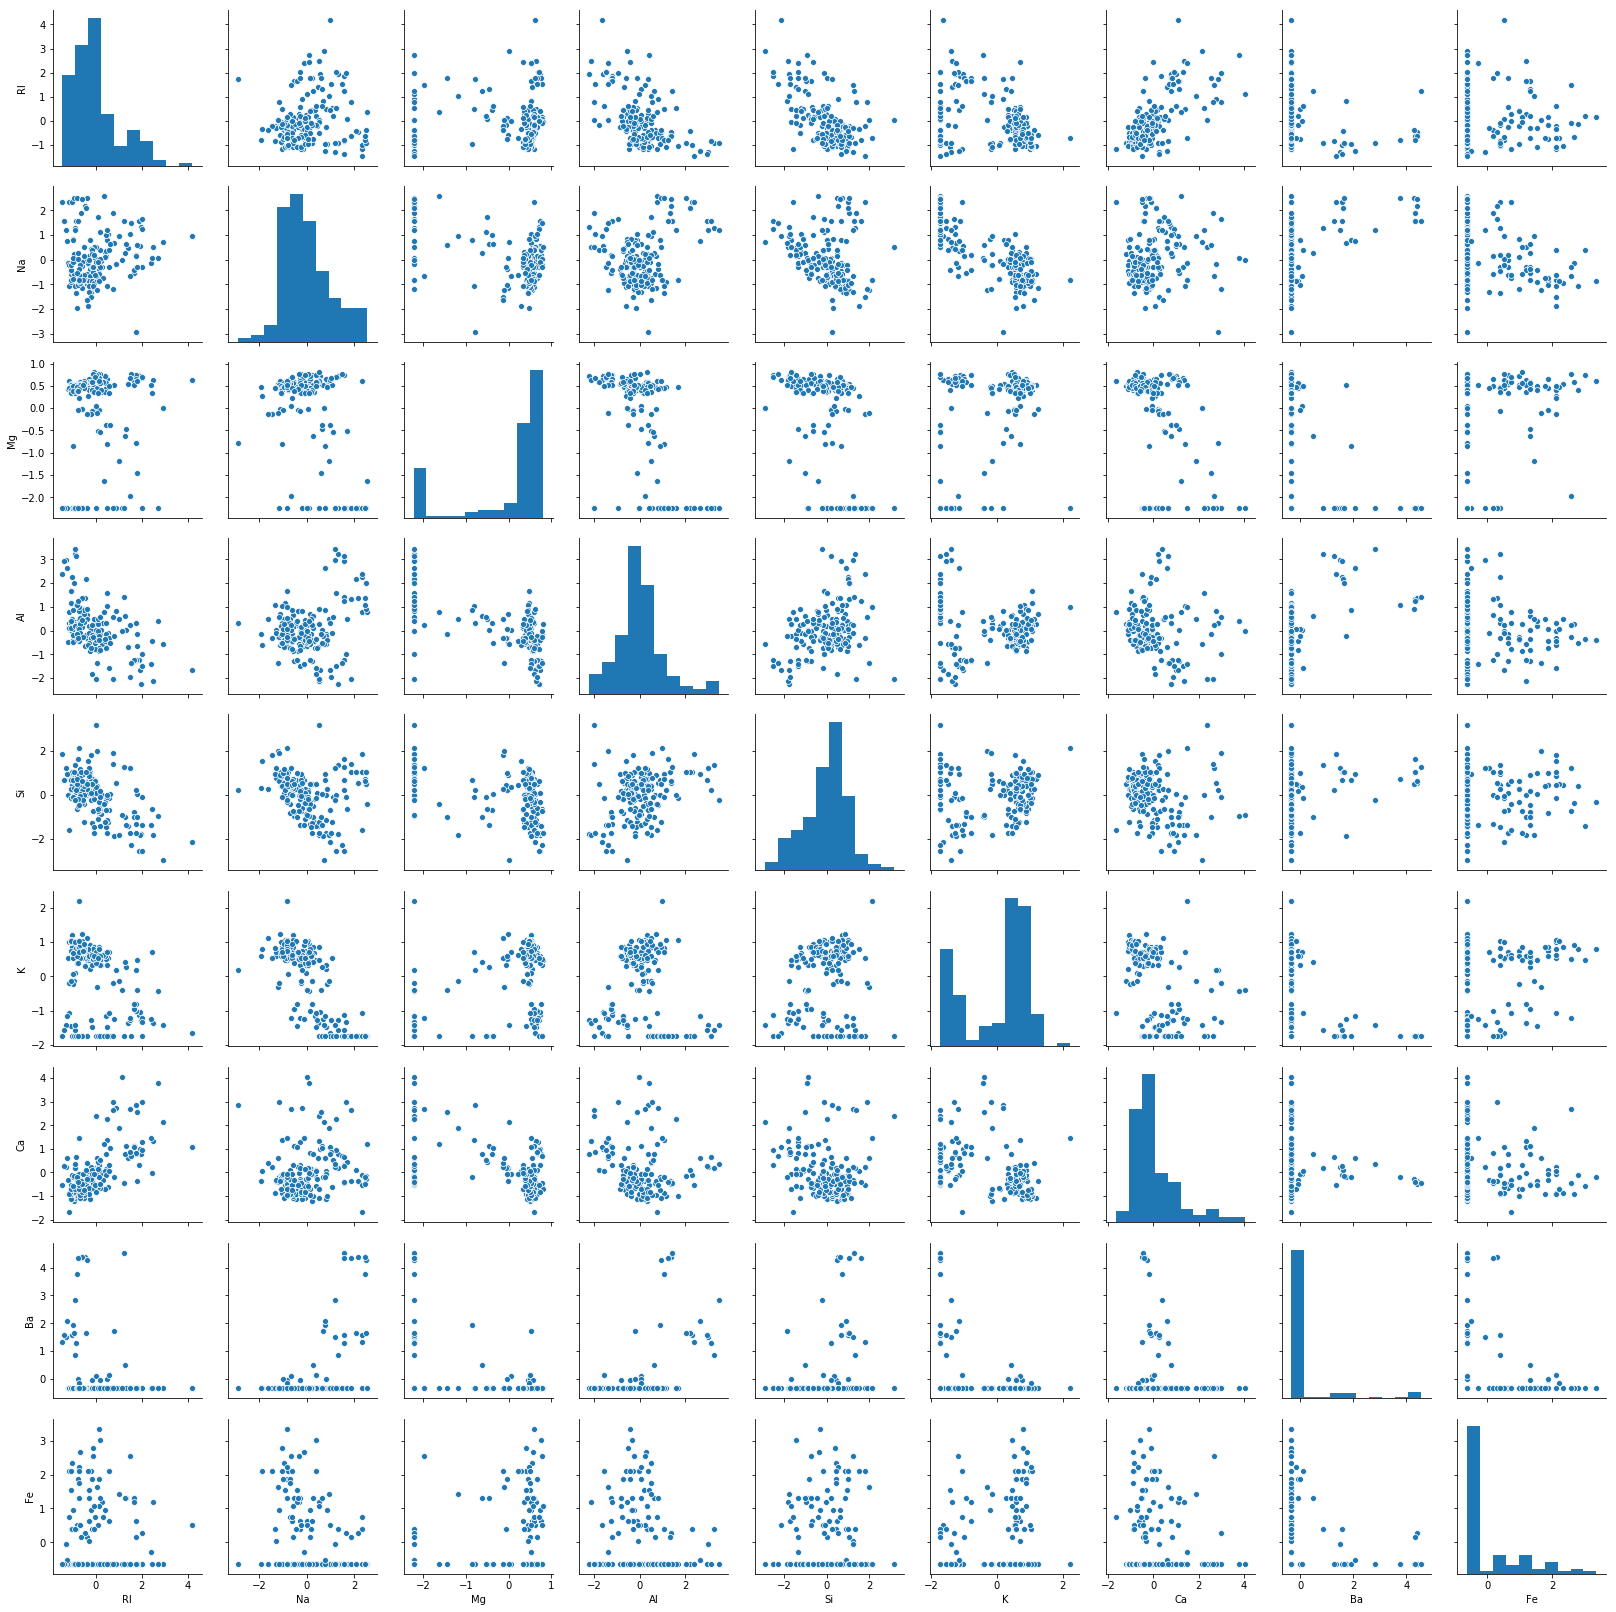

In [19]:
sns.pairplot(dat2)

In [20]:
## Clustering
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
hopkins(dat2)

0.8084076591129852

In [22]:
# Cluster the data
from sklearn.metrics import silhouette_score
sil = []
for k in range(2,10):
    kmean = KMeans(n_clusters = k).fit(dat2)
    sil.append([k, silhouette_score(dat2, kmean.labels_)])

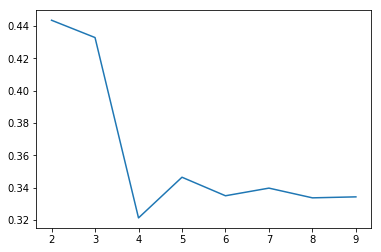

In [23]:
plt.plot(pd.DataFrame(sil)[0], pd.DataFrame(sil)[1])

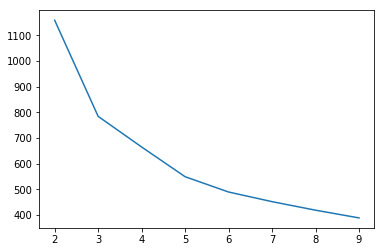

In [24]:
ssd = []
for k in range(2, 10):
    k_mean =KMeans(n_clusters = k).fit(dat2)
    ssd.append([k, k_mean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

In [25]:
kmean3 = KMeans(n_clusters = 3, random_state = 50).fit(dat2)

In [26]:
kmean3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [27]:
dat2['ID'] = df['ID'].reset_index().drop('index',axis=1)
dat2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,-0.243959,0.804726,0.545525,-0.132385,-0.003568,0.221254,-1.142618,-0.325587,-0.627780,101
1,-0.940227,0.230498,0.506928,0.291972,0.478827,-0.143347,-1.198341,-0.325587,-0.627780,102
2,-0.219614,-0.279928,0.614998,-0.297412,-0.226212,0.585855,-0.707983,-0.325587,-0.627780,103
3,-0.336470,-0.184223,0.560963,-0.415289,0.645810,0.504832,-0.875150,-0.325587,-0.627780,104
4,-1.047345,-0.949861,0.553244,0.480575,0.441720,0.869433,-0.875150,-0.325587,2.328094,105


In [28]:
dat2.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
ID    0
dtype: int64

In [29]:
dat_km_scale.columns

NameError: name 'dat_km_scale' is not defined

In [30]:
dat_km_scale = pd.concat([dat2, pd.Series(kmean3.labels_)], axis =1)
dat_km_scale.head()
dat_km_scale.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'ID', 'Cluster_id']

In [31]:
dat_km_scale.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,Cluster_id
0,-0.243959,0.804726,0.545525,-0.132385,-0.003568,0.221254,-1.142618,-0.325587,-0.627780,101,1
1,-0.940227,0.230498,0.506928,0.291972,0.478827,-0.143347,-1.198341,-0.325587,-0.627780,102,1
2,-0.219614,-0.279928,0.614998,-0.297412,-0.226212,0.585855,-0.707983,-0.325587,-0.627780,103,1
3,-0.336470,-0.184223,0.560963,-0.415289,0.645810,0.504832,-0.875150,-0.325587,-0.627780,104,1
4,-1.047345,-0.949861,0.553244,0.480575,0.441720,0.869433,-0.875150,-0.325587,2.328094,105,1


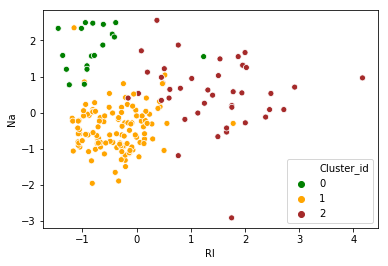

In [32]:
sns.scatterplot(x = 'RI', y  = 'Na', data = dat_km_scale, hue = 'Cluster_id', palette = ['green', 'orange', 'brown'])

In [33]:
dat_km_scale.Cluster_id.value_counts()

1    121
2     43
0     18
Name: Cluster_id, dtype: int64

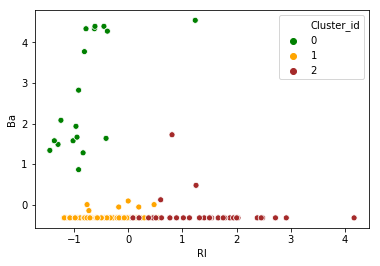

In [34]:
sns.scatterplot(x = 'RI', y  = 'Ba', data = dat_km_scale, hue = 'Cluster_id', palette = ['green', 'orange', 'brown'])

In [35]:
## Cluster Profiling
dat_km = pd.merge(df, dat_km_scale[['ID', 'Cluster_id']], on = 'ID')
dat_km.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,Cluster_id
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,101,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,102,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,103,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,104,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,105,1


In [36]:
kpi_subset = dat_km[['K', 'Ca', 'Ba', 'Fe', 'Cluster_id']]
kpi_subset.head()

,K,Ca,Ba,Fe,Cluster_id
0,0.48,7.83,0.0,0.00,1
1,0.39,7.78,0.0,0.00,1
2,0.57,8.22,0.0,0.00,1
3,0.55,8.07,0.0,0.00,1
4,0.64,8.07,0.0,0.26,1


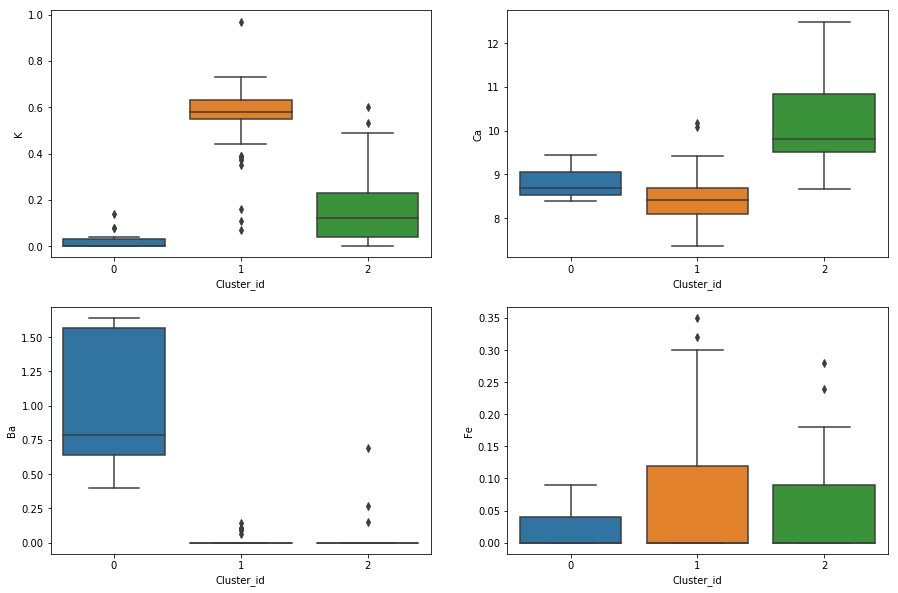

In [37]:
plt.figure(figsize = (15, 10))
features = ['K', 'Ca', 'Ba', 'Fe']
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x ='Cluster_id', y= i[1], data = kpi_subset)

In [38]:
df_test = pd.read_csv('glass.csv')
df_test['ID'] = 100+df_test.index
df_test.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ID
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,100
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,101
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,102
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,103
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,104


In [39]:
test = pd.merge(dat_km, df_test[['ID', 'Type']], on = 'ID')
test.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,Cluster_id,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,101,1,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,102,1,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,103,1,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,104,1,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,105,1,1


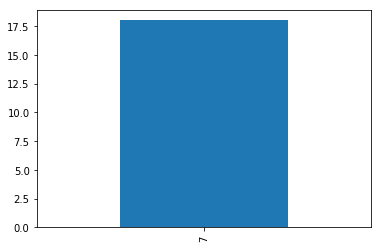

In [40]:
test[test['Cluster_id']==0]['Type'].value_counts().plot(kind = 'bar')

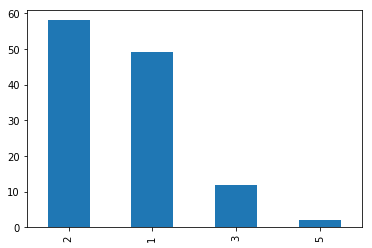

In [41]:
test[test['Cluster_id']==1]['Type'].value_counts().plot(kind = 'bar')

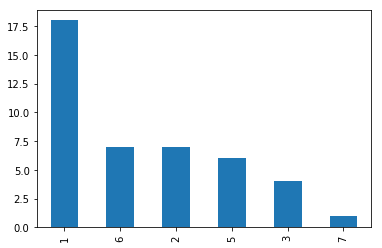

In [42]:
test[test['Cluster_id']==2]['Type'].value_counts().plot(kind = 'bar')

In [43]:
dat2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,-0.243959,0.804726,0.545525,-0.132385,-0.003568,0.221254,-1.142618,-0.325587,-0.627780,101
1,-0.940227,0.230498,0.506928,0.291972,0.478827,-0.143347,-1.198341,-0.325587,-0.627780,102
2,-0.219614,-0.279928,0.614998,-0.297412,-0.226212,0.585855,-0.707983,-0.325587,-0.627780,103
3,-0.336470,-0.184223,0.560963,-0.415289,0.645810,0.504832,-0.875150,-0.325587,-0.627780,104
4,-1.047345,-0.949861,0.553244,0.480575,0.441720,0.869433,-0.875150,-0.325587,2.328094,105
5,-0.331601,-0.136370,0.545525,-0.651043,0.664363,0.626366,-0.763705,-0.325587,-0.627780,106
6,-0.268304,-0.375632,0.553244,-0.863221,0.942668,0.585855,-0.685693,-0.325587,-0.627780,107
7,0.520476,1.043988,0.530086,-0.108809,-1.209555,0.545343,-0.618826,-0.325587,-0.627780,108
8,-0.273173,-0.614894,0.545525,-0.132385,0.478827,0.585855,-0.507381,-0.325587,0.622782,109
9,-1.169070,-1.061516,0.437455,0.339123,0.868453,0.990967,-0.852861,-0.325587,2.100720,110


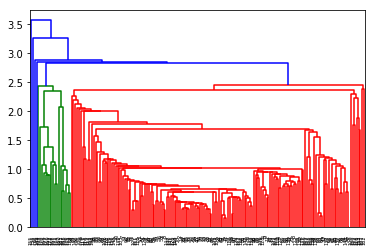

In [44]:
## Heirarchical Clustering
mergings = linkage(dat2.drop('ID', axis  =1), method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

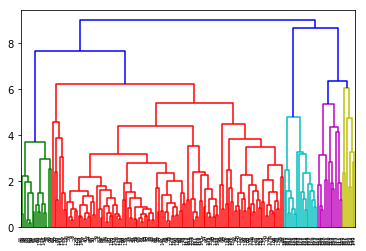

In [45]:
mergings = linkage(dat2.drop('ID', axis  =1), method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [46]:
h_label = pd.Series(cut_tree(mergings, n_clusters =3).reshape(-1,))

In [47]:
dat2.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'ID'], dtype='object')

In [48]:
dat_h = pd.concat([dat2, h_label], axis = 1)
dat_h.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'ID', 'Cluster_id']
dat_h.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,Cluster_id
0,-0.243959,0.804726,0.545525,-0.132385,-0.003568,0.221254,-1.142618,-0.325587,-0.627780,101,0
1,-0.940227,0.230498,0.506928,0.291972,0.478827,-0.143347,-1.198341,-0.325587,-0.627780,102,0
2,-0.219614,-0.279928,0.614998,-0.297412,-0.226212,0.585855,-0.707983,-0.325587,-0.627780,103,0
3,-0.336470,-0.184223,0.560963,-0.415289,0.645810,0.504832,-0.875150,-0.325587,-0.627780,104,0
4,-1.047345,-0.949861,0.553244,0.480575,0.441720,0.869433,-0.875150,-0.325587,2.328094,105,0


In [49]:
dat_h.Cluster_id.value_counts()

0    143
1     21
2     18
Name: Cluster_id, dtype: int64

In [50]:
test = pd.merge(dat_h, df_test[['ID', 'Type']], on = 'ID')
test.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,Cluster_id,Type
0,-0.243959,0.804726,0.545525,-0.132385,-0.003568,0.221254,-1.142618,-0.325587,-0.627780,101,0,1
1,-0.940227,0.230498,0.506928,0.291972,0.478827,-0.143347,-1.198341,-0.325587,-0.627780,102,0,1
2,-0.219614,-0.279928,0.614998,-0.297412,-0.226212,0.585855,-0.707983,-0.325587,-0.627780,103,0,1
3,-0.336470,-0.184223,0.560963,-0.415289,0.645810,0.504832,-0.875150,-0.325587,-0.627780,104,0,1
4,-1.047345,-0.949861,0.553244,0.480575,0.441720,0.869433,-0.875150,-0.325587,2.328094,105,0,1


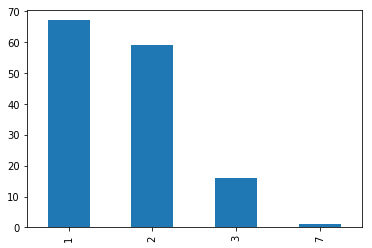

In [51]:
test[test['Cluster_id']==0]['Type'].value_counts().plot(kind = 'bar')

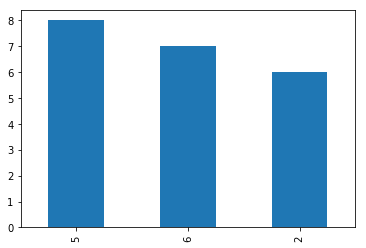

In [52]:
test[test['Cluster_id']==1]['Type'].value_counts().plot(kind = 'bar')

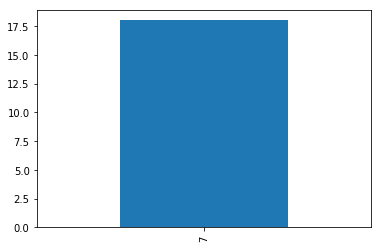

In [53]:
test[test['Cluster_id']==2]['Type'].value_counts().plot(kind = 'bar')